In [1]:
import pandas as pd

In [2]:
july_fileT = "ThonglorSalesJuly2023.csv"
august_fileT = "ThonglorSalesAugust2023.csv"
sep_fileT = "ThonglorSalesSeptember2023.csv"

df_julyt = pd.read_csv(july_fileT)
df_augustt = pd.read_csv(august_fileT)
df_sept = pd.read_csv(sep_fileT)

In [3]:
july_fileS = "SukhumvitSalesJuly2023.csv"
august_fileS = "SukhumvitSalesAugust2023.csv"
sep_fileS = "SukhumvitSalesSeptember2023.csv"

df_julys = pd.read_csv(july_fileS)
df_augusts = pd.read_csv(august_fileS)
df_seps = pd.read_csv(sep_fileS)

In [4]:
july_file = "PrompongSalesJuly2023.csv"
august_file = "PrompongSalesAugust2023.csv"
sep_file = "PrompongSalesSeptember2023.csv"

df_julyp = pd.read_csv(july_file)
df_augustp = pd.read_csv(august_file)
df_sepp = pd.read_csv(sep_file)

In [5]:
data_frames = [df_julyp, df_augustp, df_sepp, df_julys, df_augusts, df_seps, df_julyt, df_augustt, df_sept]


In [6]:
 df_augustp.columns

Index(['Date', 'Pat Cust', 'Pat Sales', 'Aom Cust', 'Aom Sales', 'Da Cust',
       'Da Sales', 'Fon Cust', 'Fon Sales', 'Nun Cust', 'Nun Sales',
       'Fhar Cust', 'Fhar Sales', 'Total Cust', 'Total Sales',
       'Voucher Amount', 'TIP', 'Total Cash Amount', 'TF Doc', 'Sales Doc',
       'TF Date', 'In Charged', 'Book Bank Checked', 'เว้นไว้'],
      dtype='object')

In [8]:
# List of data frames
data_frames = [df_julyp, df_augustp, df_sepp, df_julys, df_augusts, df_seps, df_julyt, df_augustt, df_sept]

# Initialize a variable to store the total sales
total_sales = 0

# Iterate through the data frames and sum the 'Total Sales' column
for df in data_frames:
    total_sales += df['Total Sales'].sum()

# Display the total sales
print(f"Total Sales across all data frames: {total_sales:.2f}")


Total Sales across all data frames: 2724185.00


## Random Forest Regressor

In [11]:
import warnings
from sklearn.ensemble import RandomForestRegressor

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# List of columns that are common to all your data frames
common_columns = ['Date', 'Total Sales']

# Initialize a list to store the data frames with predicted 'Total Sales'
predictions = []

# Create a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Iterate through your data frames
for df in data_frames:
    # Define independent variable (X) and dependent variable (Y)
    X = df[['Total Sales']]
    Y = df['Total Sales']

    # Fit the model to the entire data frame
    model.fit(X, Y)

    # Predict 'Total Sales' for the entire data frame
    Y_pred = model.predict(X)

    # Create a new data frame for predictions
    df_pred = df.copy()
    df_pred['Predicted Total Sales'] = Y_pred

    # Append the data frame with predictions to the list
    predictions.append(df_pred)

# Initialize a variable to store the sum of predicted Total Sales
total_predicted_sales = 0

# Iterate through the data frames in predictions
for df in predictions:
    total_predicted_sales += df['Predicted Total Sales'].sum()

print(f"Total Predicted Total Sales Across All Data Frames: {total_predicted_sales:.2f}")


Total Predicted Total Sales Across All Data Frames: 2723521.00


In [9]:
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Iterate through your data frames
for df in data_frames:
    # Define independent variable (X) and dependent variable (Y)
    X = df[['Total Sales']]
    Y = df['Total Sales']
    
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Fit the model to the training data
    model.fit(X_train, Y_train)
    
    # Predict 'Total Sales' for the testing set
    Y_pred = model.predict(X_test)
    
    # Create a new data frame for predictions
    df_pred = pd.DataFrame({'Total Sales': Y_test, 'Predicted Total Sales': Y_pred})
    
    # Append the data frame with predictions to the list
    predictions.append(df_pred)


In [15]:
from sklearn.metrics import r2_score

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Iterate through your data frames
for df in data_frames:
    # Define independent variable (X) and dependent variable (Y)
    X = df[['Total Sales']]
    Y = df['Total Sales']
    
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Fit the model to the training data
    model.fit(X_train, Y_train)
    
    # Predict 'Total Sales' for the testing set
    Y_pred = model.predict(X_test)
    
    # Calculate R-squared score
    r2 = r2_score(Y_test, Y_pred)
    
    # Create a new data frame for predictions
    df_pred = pd.DataFrame({'Total Sales': Y_test, 'Predicted Total Sales': Y_pred})
    
    # Append the data frame with predictions to the list
    predictions.append(df_pred)
    
    # Print the R-squared score
    print(f"R-squared score for this data frame: {r2}")


R-squared score for this data frame: 0.9956798507770537
R-squared score for this data frame: 0.9836733864436763
R-squared score for this data frame: 0.9758954393526256
R-squared score for this data frame: 0.9074402678864033
R-squared score for this data frame: 0.9973927220703586
R-squared score for this data frame: 0.6337781091016279
R-squared score for this data frame: 0.975985696980135
R-squared score for this data frame: 0.9255587424553611
R-squared score for this data frame: 0.9866821697567725


## Model Accuracy

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize lists to store evaluation results for each data frame
mae_scores = []
mse_scores = []
r2_scores = []

# Iterate through the data frames with predictions
for df in predictions:
    Y_true = df['Total Sales']
    Y_pred = df['Predicted Total Sales']

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(Y_true, Y_pred)
    mae_scores.append(mae)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(Y_true, Y_pred)
    mse_scores.append(mse)

    # Calculate R-squared (R^2)
    r2 = r2_score(Y_true, Y_pred)
    r2_scores.append(r2)

# Calculate the average scores across all data frames
average_mae = sum(mae_scores) / len(mae_scores)
average_mse = sum(mse_scores) / len(mse_scores)
average_r2 = sum(r2_scores) / len(r2_scores)

print(f"Average MAE: {average_mae:.2f}")
print(f"Average MSE: {average_mse:.2f}")
print(f"Average R-squared (R^2): {average_r2:.2f}")


Average MAE: 179.47
Average MSE: 135473.79
Average R-squared (R^2): 0.96


In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


# List of columns that are common to all your data frames
common_columns = ['Date', 'Total Sales']

# Initialize a list to store the data frames with predicted 'Total Sales'
predictions = []

# Create a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Initialize variables to store the sum of predicted Total Sales and actual Total Sales
total_predicted_sales = 0
total_actual_sales = 0

# Iterate through your data frames
for df in data_frames:
    # Define independent variable (X) and dependent variable (Y)
    X = df[['Total Sales']]
    Y = df['Total Sales']

    # Fit the model to the entire data frame
    model.fit(X, Y)

    # Predict 'Total Sales' for the entire data frame
    Y_pred = model.predict(X)

    # Create a new data frame for predictions
    df_pred = df.copy()
    df_pred['Predicted Total Sales'] = Y_pred

    # Append the data frame with predictions to the list
    predictions.append(df_pred)

    # Calculate the sum of actual Total Sales
    total_actual_sales += df['Total Sales'].sum()

# Calculate the sum of predicted Total Sales
for df in predictions:
    total_predicted_sales += df['Predicted Total Sales'].sum()

# Calculate the average of actual Total Sales and predicted Total Sales
average_actual_sales = total_actual_sales / len(data_frames)
average_predicted_sales = total_predicted_sales / len(predictions)

print(f"Average Actual Total Sales Across All Data Frames: {average_actual_sales:.2f}")
print(f"Average Predicted Total Sales Across All Data Frames: {average_predicted_sales:.2f}")


Average Actual Total Sales Across All Data Frames: 302687.22
Average Predicted Total Sales Across All Data Frames: 302613.44


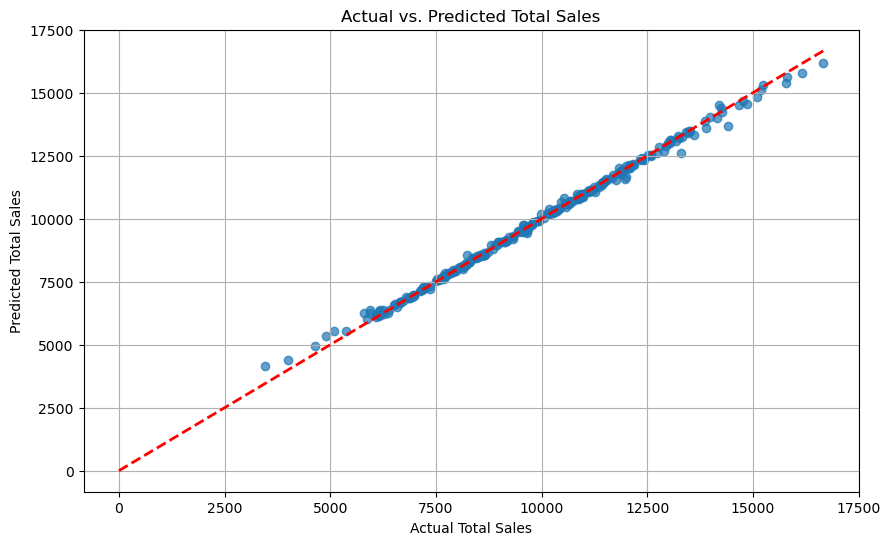

In [12]:
import matplotlib.pyplot as plt

# Initialize lists to store actual and predicted sales
actual_sales = []
predicted_sales = []

# Loop through data frames and gather data
for df in predictions:
    actual_sales.extend(df['Total Sales'])
    predicted_sales.extend(df['Predicted Total Sales'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_sales, predicted_sales, alpha=0.7)
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Actual vs. Predicted Total Sales")
plt.grid(True)

# Add a diagonal reference line for perfect predictions
max_value = max(max(actual_sales), max(predicted_sales))
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', lw=2)

plt.show()

## Highest 5 dates across all 3 branches 

In [8]:
import pandas as pd

# Concatenate the dataframes
data_frames = [df_julyp, df_augustp, df_sepp, df_julys, df_augusts, df_seps, df_julyt, df_augustt, df_sept]
combined_df = pd.concat(data_frames)

# Sort the dataframe by total sales in descending order
sorted_df = combined_df.sort_values(by='Total Sales', ascending=False)

# Get the first 5 dates with the highest total sales
top_5_dates = sorted_df['Date'].head(5)

# Display the top 5 dates
top_5_dates


19      July 20, 2023
22    August 23, 2023
10    August 11, 2023
20      July 21, 2023
29    August 30, 2023
Name: Date, dtype: object

## Bottom 5 dates across all 3 branches 

In [13]:
import pandas as pd

# Concatenate the dataframes
data_frames = [df_julyp, df_augustp, df_sepp, df_julys, df_augusts, df_seps, df_julyt, df_augustt, df_sept]
combined_df = pd.concat(data_frames)

# Sort the dataframe by total sales in ascending order
sorted_df = combined_df.sort_values(by='Total Sales')

# Get the first 5 dates with the lowest total sales
bottom_5_dates = sorted_df['Date'].head(5)

# Display the bottom 5 dates
print(bottom_5_dates)


11    September 12, 2023
23    September 24, 2023
19       August 20, 2023
15         July 16, 2023
22         July 23, 2023
Name: Date, dtype: object


## Scatter plot show relationship between day and total sale of the day across 3 months from all branches

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


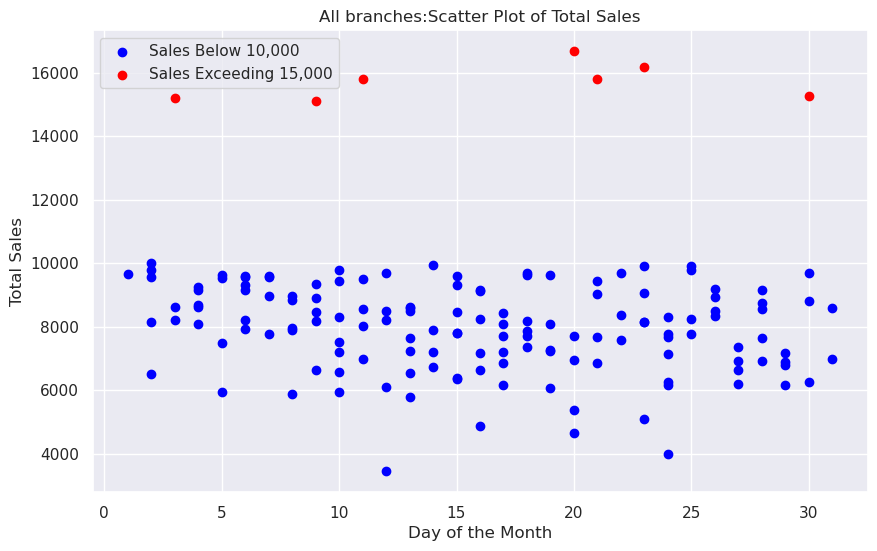

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate the dataframes
data_frames = [df_julyp, df_augustp, df_sepp, df_julys, df_augusts, df_seps, df_julyt, df_augustt, df_sept]
combined_df = pd.concat(data_frames)

# Convert the 'Date' column to datetime type
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Create a scatter plot to differentiate total sales
plt.figure(figsize=(10, 6))

# Filter data for sales below 30,000
below_10000 = combined_df[combined_df['Total Sales'] < 10000]
below_10000['Day'] = below_10000['Date'].dt.day  # Extract the day of the month
plt.scatter(below_10000['Day'], below_10000['Total Sales'], label='Sales Below 10,000', color='blue')

# Filter data for sales exceeding 30,000
exceed_15000 = combined_df[combined_df['Total Sales'] > 15000]
exceed_15000['Day'] = exceed_15000['Date'].dt.day  # Extract the day of the month
plt.scatter(exceed_15000['Day'], exceed_15000['Total Sales'], label='Sales Exceeding 15,000', color='red')

plt.xlabel('Day of the Month')
plt.ylabel('Total Sales')
plt.title('All branches:Scatter Plot of Total Sales')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Sales per branch per day:

### Days 1-5: Sales per branch range from 6,000 to 10,000 Baht. Some branches have the opportunity to exceed 15,000, especially around day 3.
### Days 6-10: Sales per branch range from 6,000 to 10,000 Baht. Some branches have the opportunity to exceed 15,000, especially around day 9.
### Days 11-15: Sales per branch range from 6,000 to 10,000 Baht. Some branches experience a significant drop, going below 4,000 Baht.Some branches have the opportunity to exceed 15,000, especially around day 11.
### Days 16-19: Sales per branch range from 5,000 to 9,000 Baht. No branch exceeds 15,000 in sales during this period.
### Days 20-25: Sales per branch range from 4,000 to 10,000 Baht. Some branches have the opportunity to exceed 15,000.
### Days 26-30: Sales per branch range from 6,000 to 10,000 Baht. Some branches have the opportunity to exceed 15,000, particularly on day 30."






In [ ]:
data_frames = [df_julyp, df_augustp, df_sepp, df_julys, df_augusts, df_seps, df_julyt, df_augustt, df_sept]


In [21]:
data_frames = [df_julyp, df_augustp, df_sepp, df_julys, df_augusts, df_seps, df_julyt, df_augustt, df_sept]

# Loop through each DataFrame and convert the 'Date' column to datetime
for df in data_frames:
    df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df_augustp.head()

,Date,Pat Cust,Pat Sales,Aom Cust,Aom Sales,Da Cust,Da Sales,Fon Cust,Fon Sales,Nun Cust,...,Total Sales,Voucher Amount,TIP,Total Cash Amount,TF Doc,Sales Doc,TF Date,In Charged,Book Bank Checked,เว้นไว้
0,2023-08-01,7,1700,8,2990,7,2400,5,2570,0,...,9660,250.0,0.0,9410.0,NaN,NaN,NaN,NaN,No,NaN
1,2023-08-02,8,2700,7,3470,7,2330,6,1970,0,...,10470,0.0,0.0,10470.0,NaN,NaN,NaN,NaN,No,NaN
2,2023-08-03,9,3030,9,3990,8,2950,7,2390,0,...,12360,0.0,0.0,12360.0,NaN,NaN,NaN,NaN,No,NaN
3,2023-08-04,7,2400,7,2040,7,2050,4,1600,0,...,8090,0.0,0.0,8090.0,NaN,NaN,NaN,NaN,No,NaN
4,2023-08-05,8,2980,11,4930,9,3310,6,3200,0,...,14420,0.0,0.0,14420.0,NaN,NaN,NaN,NaN,No,NaN


In [25]:
dfprompong = [df_julyp, df_augustp, df_sepp]
dfsukhumvit = [df_julys, df_augusts, df_seps]
dfthonglor = [df_julyt, df_augustt, df_sept] 

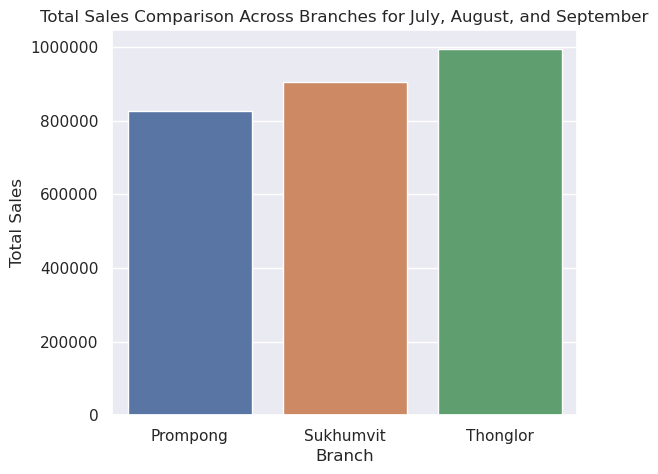

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfprompong = [df_julyp, df_augustp, df_sepp]
dfsukhumvit = [df_julys, df_augusts, df_seps]
dfthonglor = [df_julyt, df_augustt, df_sept]

# Combine data frames for each branch
dfprompong_combined = pd.concat(dfprompong)
dfsukhumvit_combined = pd.concat(dfsukhumvit)
dfthonglor_combined = pd.concat(dfthonglor)

# Sum the total sales for each branch
total_sales_prompong = dfprompong_combined['Total Sales'].sum()
total_sales_sukhumvit = dfsukhumvit_combined['Total Sales'].sum()
total_sales_thonglor = dfthonglor_combined['Total Sales'].sum()

# Create a data frame for the summed total sales
branch_data = pd.DataFrame({
    'Branch': ['Prompong', 'Sukhumvit', 'Thonglor'],
    'Total Sales': [total_sales_prompong, total_sales_sukhumvit, total_sales_thonglor]
})

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 5))
sns.set(style="darkgrid")
ax = sns.barplot(data=branch_data, x='Branch', y='Total Sales')

# Format y-axis labels without scientific notation
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Total Sales Comparison Across Branches for July, August, and September')
plt.show()
